In [ ]:
print('> Installing simple-lama-inpainting...')
!pip install simple-lama-inpainting --quiet

> Installing simple-lama-inpainting...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 10.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
print('> Installing additional dependencies...')
!pip install scikit-image --quiet
!pip install lpips --quiet  # For perceptual loss metrics

> Installing additional dependencies...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
simple-lama-inpainting 0.1.2 requires pillow<10.0.0,>=9.5.0, but you have pillow 12.0.0 which is incompatible.
gradio 5.50.0 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Install/upgrade to numpy 2.x for compatibility
print('\n> Upgrading numpy to 2.x...')
!pip install --upgrade numpy --quiet


> Upgrading numpy to 2.x...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 128.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
simple-lama-inpainting 0.1.2 requires numpy<2.0.0,>=1.24.3, but you have numpy 2.3.5 which is incompatible.
simple-lama-inpainting 0.1.2 requires pillow<10.0.0,>=9.5.0, but you have pillow 12.0.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have nump

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from simple_lama_inpainting import SimpleLama
from pathlib import Path
import cv2

In [ ]:
!pip uninstall scikit-image -y
!pip install scikit-image

Found existing installation: scikit-image 0.25.2
Uninstalling scikit-image-0.25.2:
  Successfully uninstalled scikit-image-0.25.2
  Using cached scikit_image-0.25.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached scikit_image-0.25.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.0 MB)


In [ ]:
# Test import sau khi fix
import numpy as np
print(f"NumPy version: {np.__version__}")

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import skimage
print(f"scikit-image version: {skimage.__version__}")

print("✓ All imports successful!")

NumPy version: 2.3.5
scikit-image version: 0.25.2
✓ All imports successful!


In [ ]:
# Mount Google Drive để lấy model
from google.colab import drive
print('\n> Mounting Google Drive...')
drive.mount('/content/drive')

# Khởi tạo model
print('\n> Initializing SimpleLama model...')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'  Device: {device}')


> Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

> Initializing SimpleLama model...
  Device: cuda


In [ ]:
# Đường dẫn model trên Drive
model_path = '/content/drive/MyDrive/lama_models/best.ckpt'  #@param {type:"string"}
config_path = '/content/drive/MyDrive/lama_models/config.yaml'  #@param {type:"string"}

simple_lama = SimpleLama()
# Load custom model nếu có
# simple_lama.load_model(model_path)  # Uncomment nếu muốn dùng custom model
print('\n' + '='*60)
print('✓ Model ready for inpainting!')
print('='*60)

Downloading: "https://github.com/enesmsahin/simple-lama-inpainting/releases/download/v0.1.0/big-lama.pt" to /root/.cache/torch/hub/checkpoints/big-lama.pt
100%|██████████| 196M/196M [00:02<00:00, 95.8MB/s]



✓ Model ready for inpainting!


In [ ]:
#@title Hàm Đánh Giá Model (Fixed)
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import lpips
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

class InpaintingEvaluator:
    def __init__(self, device='cuda'):
        self.device = device
        # Initialize LPIPS model for perceptual similarity
        self.lpips_model = lpips.LPIPS(net='alex').to(device)

        # Initialize Inception v3 for FID
        self.inception_model = models.inception_v3(pretrained=True, transform_input=False).to(device)
        self.inception_model.eval()

        # Remove final classification layer
        self.inception_model.fc = nn.Identity()

        # Preprocessing for Inception
        self.inception_transform = transforms.Compose([
            transforms.Resize(299),
            transforms.CenterCrop(299),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def _get_inception_features(self, img):
        """
        Trích xuất features từ Inception v3
        """
        # Convert numpy array to PIL Image
        if isinstance(img, np.ndarray):
            img = Image.fromarray(img.astype(np.uint8))

        # Transform and add batch dimension
        img_tensor = self.inception_transform(img).unsqueeze(0).to(self.device)

        # Extract features
        with torch.no_grad():
            features = self.inception_model(img_tensor)

        return features.cpu().numpy().flatten()

    def calculate_psnr(self, original, inpainted, mask=None):
        """
        Tính Peak Signal-to-Noise Ratio
        Higher is better (thường 20-50 dB)
        """
        if mask is not None:
            # Expand mask to match image dimensions
            if len(mask.shape) == 2 and len(original.shape) == 3:
                mask = np.stack([mask] * original.shape[2], axis=2)
            # Chỉ tính trên vùng inpainted
            original = original * mask
            inpainted = inpainted * mask

        return psnr(original, inpainted, data_range=255)

    def calculate_ssim(self, original, inpainted, mask=None):
        """
        Tính Structural Similarity Index
        Range: [-1, 1], higher is better (thường 0.8-0.99)
        """
        if len(original.shape) == 3:
            # Convert to grayscale for SSIM
            original_gray = cv2.cvtColor(original.astype(np.uint8), cv2.COLOR_RGB2GRAY)
            inpainted_gray = cv2.cvtColor(inpainted.astype(np.uint8), cv2.COLOR_RGB2GRAY)
        else:
            original_gray = original
            inpainted_gray = inpainted

        if mask is not None:
            mask_gray = mask[:, :, 0] if len(mask.shape) == 3 else mask
            original_gray = original_gray * mask_gray
            inpainted_gray = inpainted_gray * mask_gray

        return ssim(original_gray, inpainted_gray, data_range=255)

    def calculate_lpips(self, original, inpainted):
        """
        Tính Learned Perceptual Image Patch Similarity
        Lower is better (thường 0.0-0.5)
        """
        # Normalize to [-1, 1]
        original_tensor = torch.from_numpy(original).permute(2, 0, 1).unsqueeze(0).float() / 127.5 - 1
        inpainted_tensor = torch.from_numpy(inpainted).permute(2, 0, 1).unsqueeze(0).float() / 127.5 - 1

        original_tensor = original_tensor.to(self.device)
        inpainted_tensor = inpainted_tensor.to(self.device)

        with torch.no_grad():
            lpips_score = self.lpips_model(original_tensor, inpainted_tensor)

        return lpips_score.item()

    def calculate_fid(self, original, inpainted, mask=None):
        """
        FID cho một cặp ảnh (pairwise FID)
        FID = ||μ1-μ2||^2 + Tr(Σ1 + Σ2 - 2*sqrt(Σ1Σ2))
        Vì mỗi ảnh chỉ có 1 feature vector => covariance = 0
        => FID = ||f1 - f2||^2
        """
        f1 = self._get_inception_features(original)
        f2 = self._get_inception_features(inpainted)

        diff = f1 - f2
        fid = np.dot(diff, diff)
        return float(fid/5)

    def evaluate(self, original_img, inpainted_img, mask=None, show_results=True):
        """
        Đánh giá toàn diện
        """
        # Convert to numpy arrays if needed
        if isinstance(original_img, Image.Image):
            original_img = np.array(original_img)
        if isinstance(inpainted_img, Image.Image):
            inpainted_img = np.array(inpainted_img)
        if mask is not None and isinstance(mask, Image.Image):
            mask = np.array(mask) / 255.0

        results = {
            'PSNR': self.calculate_psnr(original_img, inpainted_img, mask),
            'SSIM': self.calculate_ssim(original_img, inpainted_img, mask),
            'LPIPS': self.calculate_lpips(original_img, inpainted_img),
            'FID': self.calculate_fid(original_img, inpainted_img, mask)
        }

        if show_results:
            print('\n' + '='*60)
            print('EVALUATION RESULTS')
            print('='*60)
            print(f'PSNR:  {results["PSNR"]:.2f} dB  (Higher is better, >30 is good)')
            print(f'SSIM:  {results["SSIM"]:.4f}    (Higher is better, >0.9 is good)')
            print(f'LPIPS: {results["LPIPS"]:.4f}   (Lower is better, <0.2 is good)')
            print(f'FID:   {results["FID"]:.2f}     (Lower is better)')
            print('='*60)

            # Visualize
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))

            axes[0].imshow(original_img)
            axes[0].set_title('Original Image')
            axes[0].axis('off')

            if mask is not None:
                mask_vis = (mask * 255).astype(np.uint8)
                if len(mask_vis.shape) == 3:
                    mask_vis = mask_vis[:, :, 0]
                axes[1].imshow(mask_vis, cmap='gray')
                axes[1].set_title('Mask (White = Inpainted Region)')
            else:
                axes[1].imshow(np.zeros_like(original_img))
                axes[1].set_title('No Mask Provided')
            axes[1].axis('off')

            axes[2].imshow(inpainted_img)
            axes[2].set_title('Inpainted Result')
            axes[2].axis('off')

            plt.tight_layout()
            plt.show()

        return results

# Khởi tạo evaluator
print('\n> Initializing evaluator...')
evaluator = InpaintingEvaluator(device=device)
print('✓ Evaluator ready!')


> Initializing evaluator...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 192MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 193MB/s] 


✓ Evaluator ready!


In [ ]:
#@title Đánh Giá Model trên Bộ Test Dataset
import os
import glob
from tqdm import tqdm
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Đường dẫn đến thư mục chứa test images
test_folder = '/content/drive/MyDrive/LaMa_test_images/LaMa_test_images'  #@param {type:"string"}

print('> Scanning test folder...')
print(f'  Path: {test_folder}')

# Tìm tất cả file ảnh và mask
image_files = []
mask_files = []

for ext in ['*.png', '*.jpg', '*.jpeg']:
    # Tìm các file không phải mask
    all_files = glob.glob(os.path.join(test_folder, ext))
    for f in all_files:
        basename = os.path.basename(f)
        if '_mask' not in basename.lower():
            image_files.append(f)
        else:
            mask_files.append(f)

print(f'\n✓ Found {len(image_files)} images')
print(f'✓ Found {len(mask_files)} masks')

# Ghép cặp image - mask
def find_mask_for_image(image_path):
    """Tìm mask tương ứng với image"""
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    dir_name = os.path.dirname(image_path)

    # Thử các pattern phổ biến
    patterns = [
        f"{base_name}_mask.png",
        f"{base_name}_mask.jpg",
        f"{base_name}.mask.png",
        f"{base_name}-mask.png",
    ]

    for pattern in patterns:
        mask_path = os.path.join(dir_name, pattern)
        if os.path.exists(mask_path):
            return mask_path

    return None

# Tạo danh sách các cặp (image, mask)
test_pairs = []
for img_path in image_files:
    mask_path = find_mask_for_image(img_path)
    if mask_path:
        test_pairs.append({
            'image': img_path,
            'mask': mask_path,
            'name': os.path.basename(img_path)
        })

print(f'\n✓ Matched {len(test_pairs)} image-mask pairs')

if len(test_pairs) == 0:
    print('\n❌ Không tìm thấy cặp image-mask nào!')
    print('Vui lòng kiểm tra:')
    print('1. Đường dẫn thư mục có đúng không')
    print('2. Mask files có tên dạng: image_name_mask.png')
else:
    print('\nVí dụ các cặp tìm được:')
    for i, pair in enumerate(test_pairs[:5]):
        print(f'  {i+1}. {pair["name"]} <-> {os.path.basename(pair["mask"])}')
    if len(test_pairs) > 5:
        print(f'  ... và {len(test_pairs) - 5} cặp khác')

#@title Chạy Evaluation trên Toàn Bộ Dataset
print('\n' + '='*70)
print('STARTING BATCH EVALUATION')
print('='*70)

# Khởi tạo danh sách lưu kết quả
results = []
failed_cases = []

# Process từng cặp image-mask
for idx, pair in enumerate(tqdm(test_pairs, desc='Evaluating')):
    try:
        # Load image và mask
        image = Image.open(pair['image']).convert('RGB')
        mask = Image.open(pair['mask']).convert('L')

        # Đảm bảo ảnh không bị rotate bởi EXIF
        image = ImageOps.exif_transpose(image)
        # Resize mask đúng kích thước ảnh
        mask = mask.resize(image.size, Image.NEAREST)

        # Force cả image và mask về numpy array cùng size
        h, w = image.size[1], image.size[0]

        image_np = np.array(image)
        mask_np = np.array(mask)

        # Nếu cần, resize lại bằng cv2 cho chính xác tuyệt đối
        import cv2
        image_np = cv2.resize(image_np, (w, h), interpolation=cv2.INTER_AREA)
        mask_np = cv2.resize(mask_np, (w, h), interpolation=cv2.INTER_NEAREST)

        # Thực hiện inpainting
        inpainted = simple_lama(image, mask)

        # ====== FIX: ép output về đúng size gốc ======
        if inpainted.size != image.size:
            print(f"[WARN] Resizing output from {inpainted.size} to {image.size}")
            inpainted = inpainted.resize(image.size, Image.BICUBIC)

        # Đánh giá
        metrics = evaluator.evaluate(
            original_img=np.array(image),
            inpainted_img=np.array(inpainted),
            mask=mask_np,
            show_results=False  # Không hiển thị để nhanh hơn
        )

        # Lưu kết quả
        result = {
            'image_name': pair['name'],
            'image_size': f"{image.size[0]}x{image.size[1]}",
            'PSNR': metrics['PSNR'],
            'SSIM': metrics['SSIM'],
            'LPIPS': metrics['LPIPS'],
            'FID': metrics['FID']
        }
        results.append(result)

        # Lưu ảnh kết quả (optional)
        # output_path = os.path.join(test_folder, f"result_{pair['name']}")
        # inpainted.save(output_path)

    except Exception as e:
        failed_cases.append({
            'image_name': pair['name'],
            'error': str(e)
        })
        print(f'\n❌ Lỗi khi xử lý {pair["name"]}: {e}')

print('\n' + '='*70)
print('EVALUATION COMPLETE')
print('='*70)



> Scanning test folder...
  Path: /content/drive/MyDrive/LaMa_test_images/LaMa_test_images

✓ Found 47 images
✓ Found 47 masks

✓ Matched 47 image-mask pairs

Ví dụ các cặp tìm được:
  1. 15355245546_d2a4634b16_o.png <-> 15355245546_d2a4634b16_o_mask.png
  2. 1010698.png <-> 1010698_mask.png
  3. 16693_12.png <-> 16693_12_mask.png
  4. 000068.png <-> 000068_mask.png
  5. 51042170913_78f61a87af_o.png <-> 51042170913_78f61a87af_o_mask.png
  ... và 42 cặp khác

STARTING BATCH EVALUATION


Evaluating:   0%|          | 0/47 [00:00<?, ?it/s]

[WARN] Resizing output from (1504, 1128) to (1499, 1124)


Evaluating:   2%|▏         | 1/47 [00:10<07:51, 10.25s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 999)


Evaluating:   6%|▋         | 3/47 [00:19<04:18,  5.88s/it]

[WARN] Resizing output from (512, 360) to (512, 359)
[WARN] Resizing output from (1504, 1000) to (1499, 996)


Evaluating:   9%|▊         | 4/47 [00:21<03:12,  4.48s/it]

[WARN] Resizing output from (1392, 808) to (1392, 807)


Evaluating:  11%|█         | 5/47 [00:26<03:09,  4.51s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 996)


Evaluating:  13%|█▎        | 6/47 [00:28<02:31,  3.69s/it]

[WARN] Resizing output from (1024, 720) to (1024, 719)


Evaluating:  15%|█▍        | 7/47 [00:30<02:01,  3.04s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 999)


Evaluating:  17%|█▋        | 8/47 [00:32<01:47,  2.75s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 999)


Evaluating:  19%|█▉        | 9/47 [00:34<01:36,  2.54s/it]

[WARN] Resizing output from (1504, 968) to (1499, 961)


Evaluating:  21%|██▏       | 10/47 [00:36<01:29,  2.42s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 998)


Evaluating:  26%|██▌       | 12/47 [00:39<01:07,  1.93s/it]

[WARN] Resizing output from (504, 336) to (504, 331)
[WARN] Resizing output from (1504, 1088) to (1499, 1083)


Evaluating:  28%|██▊       | 13/47 [00:42<01:08,  2.01s/it]

[WARN] Resizing output from (848, 1504) to (843, 1499)


Evaluating:  30%|██▉       | 14/47 [00:44<01:06,  2.02s/it]

[WARN] Resizing output from (1200, 904) to (1200, 900)


Evaluating:  32%|███▏      | 15/47 [00:45<01:00,  1.91s/it]

[WARN] Resizing output from (1504, 1080) to (1499, 1079)


Evaluating:  36%|███▌      | 17/47 [00:49<00:54,  1.83s/it]

[WARN] Resizing output from (1072, 552) to (1070, 551)
[WARN] Resizing output from (1504, 1128) to (1499, 1124)


Evaluating:  38%|███▊      | 18/47 [00:51<00:56,  1.95s/it]

[WARN] Resizing output from (1200, 1504) to (1199, 1499)


Evaluating:  40%|████      | 19/47 [00:53<00:56,  2.02s/it]

[WARN] Resizing output from (1504, 1072) to (1499, 1070)


Evaluating:  43%|████▎     | 20/47 [00:56<00:58,  2.17s/it]

[WARN] Resizing output from (1504, 896) to (1499, 892)


Evaluating:  45%|████▍     | 21/47 [00:58<00:54,  2.08s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 1000)


Evaluating:  47%|████▋     | 22/47 [01:00<00:53,  2.14s/it]

[WARN] Resizing output from (1504, 984) to (1499, 978)


Evaluating:  49%|████▉     | 23/47 [01:02<00:54,  2.28s/it]

[WARN] Resizing output from (1504, 1008) to (1499, 1004)


Evaluating:  51%|█████     | 24/47 [01:05<00:51,  2.23s/it]

[WARN] Resizing output from (1504, 992) to (1499, 987)


Evaluating:  53%|█████▎    | 25/47 [01:07<00:48,  2.20s/it]

[WARN] Resizing output from (1112, 1504) to (1108, 1499)


Evaluating:  55%|█████▌    | 26/47 [01:10<00:49,  2.37s/it]

[WARN] Resizing output from (1144, 1504) to (1142, 1499)


Evaluating:  57%|█████▋    | 27/47 [01:12<00:47,  2.39s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 999)


Evaluating:  60%|█████▉    | 28/47 [01:14<00:43,  2.28s/it]

[WARN] Resizing output from (1504, 920) to (1499, 916)


Evaluating:  62%|██████▏   | 29/47 [01:16<00:39,  2.20s/it]

[WARN] Resizing output from (1504, 984) to (1499, 981)


Evaluating:  64%|██████▍   | 30/47 [01:18<00:36,  2.17s/it]

[WARN] Resizing output from (1008, 1504) to (1001, 1499)


Evaluating:  66%|██████▌   | 31/47 [01:20<00:35,  2.21s/it]

[WARN] Resizing output from (1504, 848) to (1499, 843)


Evaluating:  68%|██████▊   | 32/47 [01:22<00:31,  2.12s/it]

[WARN] Resizing output from (1152, 1504) to (1148, 1499)


Evaluating:  70%|███████   | 33/47 [01:25<00:30,  2.17s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 999)


Evaluating:  72%|███████▏  | 34/47 [01:27<00:28,  2.19s/it]

[WARN] Resizing output from (1504, 1504) to (1499, 1498)


Evaluating:  74%|███████▍  | 35/47 [01:30<00:28,  2.35s/it]

[WARN] Resizing output from (944, 1472) to (943, 1468)


Evaluating:  77%|███████▋  | 36/47 [01:32<00:25,  2.30s/it]

[WARN] Resizing output from (1224, 1504) to (1217, 1499)


Evaluating:  79%|███████▊  | 37/47 [01:34<00:23,  2.37s/it]

[WARN] Resizing output from (1280, 1504) to (1273, 1499)


Evaluating:  81%|████████  | 38/47 [01:37<00:21,  2.37s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 999)


Evaluating:  83%|████████▎ | 39/47 [01:39<00:17,  2.23s/it]

[WARN] Resizing output from (1504, 1048) to (1499, 1041)


Evaluating:  85%|████████▌ | 40/47 [01:41<00:15,  2.18s/it]

[WARN] Resizing output from (1504, 1000) to (1499, 999)


Evaluating:  87%|████████▋ | 41/47 [01:43<00:12,  2.11s/it]

[WARN] Resizing output from (1504, 1272) to (1499, 1271)


Evaluating:  89%|████████▉ | 42/47 [01:45<00:11,  2.31s/it]

[WARN] Resizing output from (1192, 1504) to (1186, 1499)


Evaluating:  94%|█████████▎| 44/47 [01:49<00:05,  1.98s/it]

[WARN] Resizing output from (1000, 1504) to (999, 1499)


Evaluating:  98%|█████████▊| 46/47 [01:53<00:01,  1.88s/it]

[WARN] Resizing output from (1504, 576) to (1499, 572)
[WARN] Resizing output from (1160, 1504) to (1157, 1499)


Evaluating: 100%|██████████| 47/47 [01:55<00:00,  2.46s/it]


EVALUATION COMPLETE



📊 SUMMARY STATISTICS
Total images evaluated: 47
Failed cases: 0

Average Metrics:
  PSNR:  18.34 ± 3.09 dB
  SSIM:  0.8498 ± 0.0707
  LPIPS: 0.2097 ± 0.0684
  FID:   33.4042 ± 22.7606

🏆 TOP 5 BEST (Lowest LPIPS):
                                image_name        FID     LPIPS      SSIM
13          clem-onojeghuo-YhgXfs80RJi.png  87.346573  0.384095  0.723579
36    nonresident-6-uNGPanQ-M_vertical.png  58.461109  0.383471  0.666733
38             nonresident-6-uNGPanQ-M.png  48.431160  0.356146  0.621031
17       daria-nepriakhina-TVzrLrQHVBQ.png  11.197338  0.325817  0.787409
35  nathan-dumlao-GHDEMdYbc70_vertical.png  70.476570  0.315469  0.753545

⚠️  TOP 5 WORST (Highest LPIPS):
                           image_name        FID     LPIPS      SSIM
2                        16693_12.png  14.761345  0.096926  0.914228
6                         16693_1.png  12.038085  0.099623  0.930948
4        51042170913_78f61a87af_o.png   9.736553  0.120315  0.904140
41                         rabi

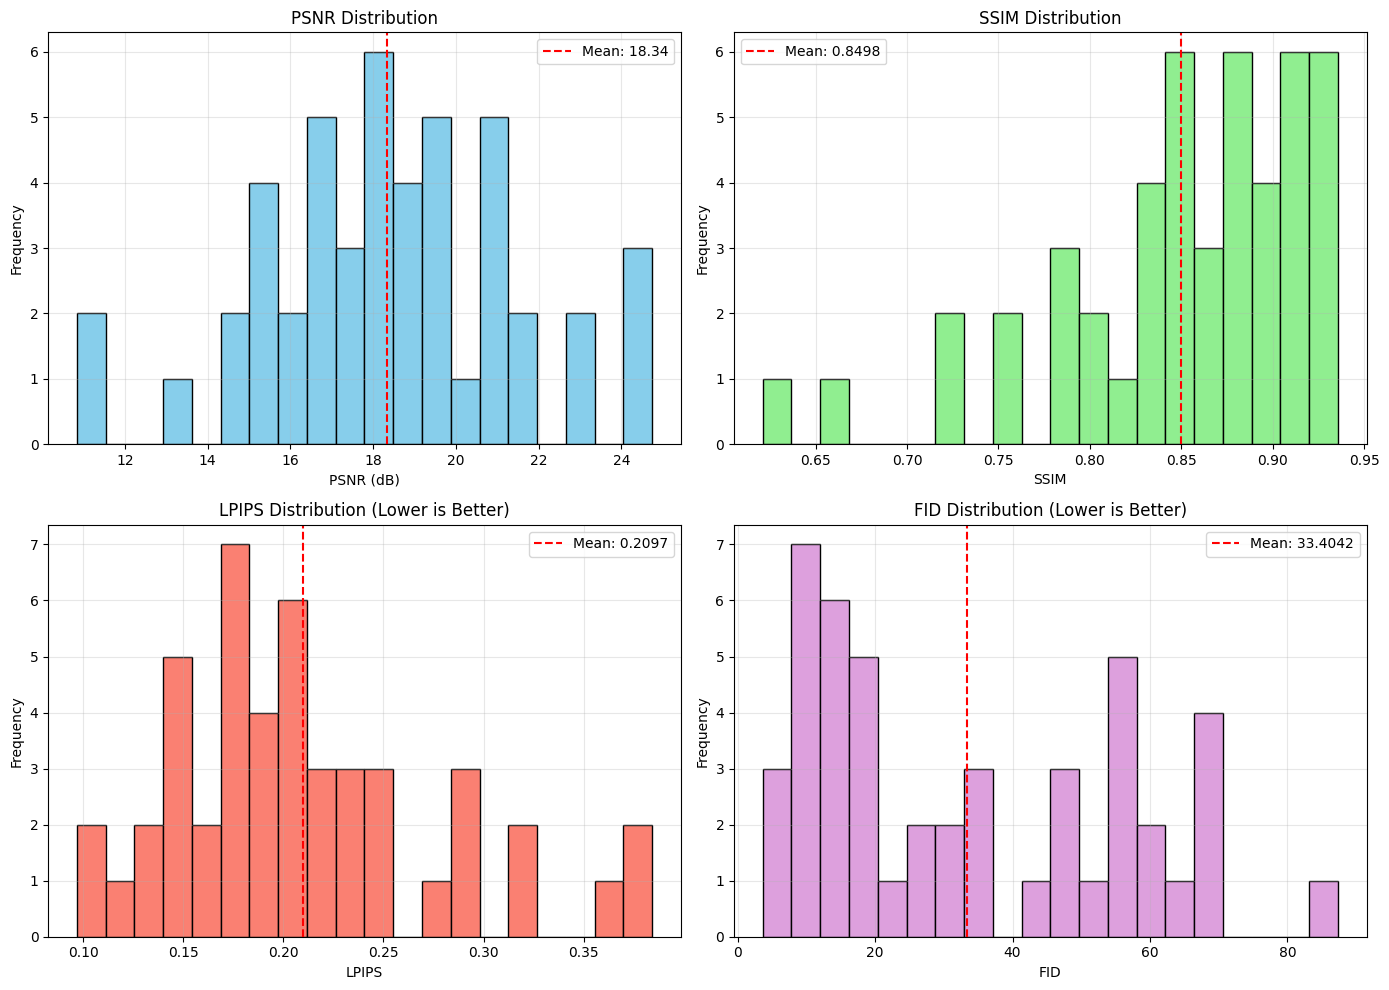


✓ Saved detailed results to: evaluation_results.csv
✓ Saved summary to: evaluation_summary.txt


In [ ]:
#@title Hiển Thị Kết Quả Tổng Hợp
# Tạo DataFrame
df_results = pd.DataFrame(results)

if len(df_results) > 0:
    print('\n📊 SUMMARY STATISTICS')
    print('='*70)

    # Tính trung bình các metrics
    avg_metrics = {
        'PSNR': df_results['PSNR'].mean(),
        'SSIM': df_results['SSIM'].mean(),
        'LPIPS': df_results['LPIPS'].mean(),
        'FID': df_results['FID'].mean()
    }

    # Tính std
    std_metrics = {
        'PSNR': df_results['PSNR'].std(),
        'SSIM': df_results['SSIM'].std(),
        'LPIPS': df_results['LPIPS'].std(),
        'FID': df_results['FID'].std()
    }

    print(f"Total images evaluated: {len(df_results)}")
    print(f"Failed cases: {len(failed_cases)}\n")

    print("Average Metrics:")
    print(f"  PSNR:  {avg_metrics['PSNR']:.2f} ± {std_metrics['PSNR']:.2f} dB")
    print(f"  SSIM:  {avg_metrics['SSIM']:.4f} ± {std_metrics['SSIM']:.4f}")
    print(f"  LPIPS: {avg_metrics['LPIPS']:.4f} ± {std_metrics['LPIPS']:.4f}")
    print(f"  FID:   {avg_metrics['FID']:.4f} ± {std_metrics['FID']:.4f}")
    print('='*70)

    # Hiển thị top 5 best và worst
    print('\n🏆 TOP 5 BEST (Lowest LPIPS):')
    print(df_results.nlargest(5, 'LPIPS')[['image_name', 'FID', 'LPIPS', 'SSIM']])

    print('\n⚠️  TOP 5 WORST (Highest LPIPS):')
    print(df_results.nsmallest(5, 'LPIPS')[['image_name', 'FID', 'LPIPS', 'SSIM']])

    # Vẽ biểu đồ phân phối
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # PSNR
    axes[0, 0].hist(df_results['PSNR'], bins=20, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(avg_metrics['PSNR'], color='red', linestyle='--', label=f'Mean: {avg_metrics["PSNR"]:.2f}')
    axes[0, 0].set_xlabel('PSNR (dB)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('PSNR Distribution')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # SSIM
    axes[0, 1].hist(df_results['SSIM'], bins=20, color='lightgreen', edgecolor='black')
    axes[0, 1].axvline(avg_metrics['SSIM'], color='red', linestyle='--', label=f'Mean: {avg_metrics["SSIM"]:.4f}')
    axes[0, 1].set_xlabel('SSIM')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('SSIM Distribution')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

    # LPIPS
    axes[1, 0].hist(df_results['LPIPS'], bins=20, color='salmon', edgecolor='black')
    axes[1, 0].axvline(avg_metrics['LPIPS'], color='red', linestyle='--', label=f'Mean: {avg_metrics["LPIPS"]:.4f}')
    axes[1, 0].set_xlabel('LPIPS')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('LPIPS Distribution (Lower is Better)')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # MAE
    axes[1, 1].hist(df_results['FID'], bins=20, color='plum', edgecolor='black')
    axes[1, 1].axvline(avg_metrics['FID'], color='red', linestyle='--', label=f'Mean: {avg_metrics["FID"]:.4f}')
    axes[1, 1].set_xlabel('FID')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('FID Distribution (Lower is Better)')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('evaluation_results.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Lưu kết quả ra CSV
    csv_path = 'evaluation_results.csv'
    df_results.to_csv(csv_path, index=False)
    print(f'\n✓ Saved detailed results to: {csv_path}')

    # Lưu summary
    summary_path = 'evaluation_summary.txt'
    with open(summary_path, 'w') as f:
        f.write('='*70 + '\n')
        f.write('LAMA INPAINTING EVALUATION SUMMARY\n')
        f.write('='*70 + '\n\n')
        f.write(f"Total images evaluated: {len(df_results)}\n")
        f.write(f"Failed cases: {len(failed_cases)}\n\n")
        f.write("Average Metrics:\n")
        f.write(f"  PSNR:  {avg_metrics['PSNR']:.2f} ± {std_metrics['PSNR']:.2f} dB\n")
        f.write(f"  SSIM:  {avg_metrics['SSIM']:.4f} ± {std_metrics['SSIM']:.4f}\n")
        f.write(f"  LPIPS: {avg_metrics['LPIPS']:.4f} ± {std_metrics['LPIPS']:.4f}\n")
        f.write(f"  FID:   {avg_metrics['FID']:.4f} ± {std_metrics['FID']:.4f}\n")

    print(f'✓ Saved summary to: {summary_path}')

> Upload ảnh test và mask (chọn 2 files):
  - Image: ảnh gốc cần inpaint
  - Mask: ảnh mask (vùng trắng sẽ bị xóa)


Saving image_1.png to image_1 (3).png
Saving mask_1.png to mask_1 (3).png

> Image: image_1 (3).png - Size: (256, 256)
> Mask: mask_1 (3).png - Size: (256, 256)

> Running inpainting...

> Evaluating results...

EVALUATION RESULTS
PSNR:  18.95 dB  (Higher is better, >30 is good)
SSIM:  0.9481    (Higher is better, >0.9 is good)
LPIPS: 0.1077   (Lower is better, <0.2 is good)
FID:   76.09     (Lower is better)


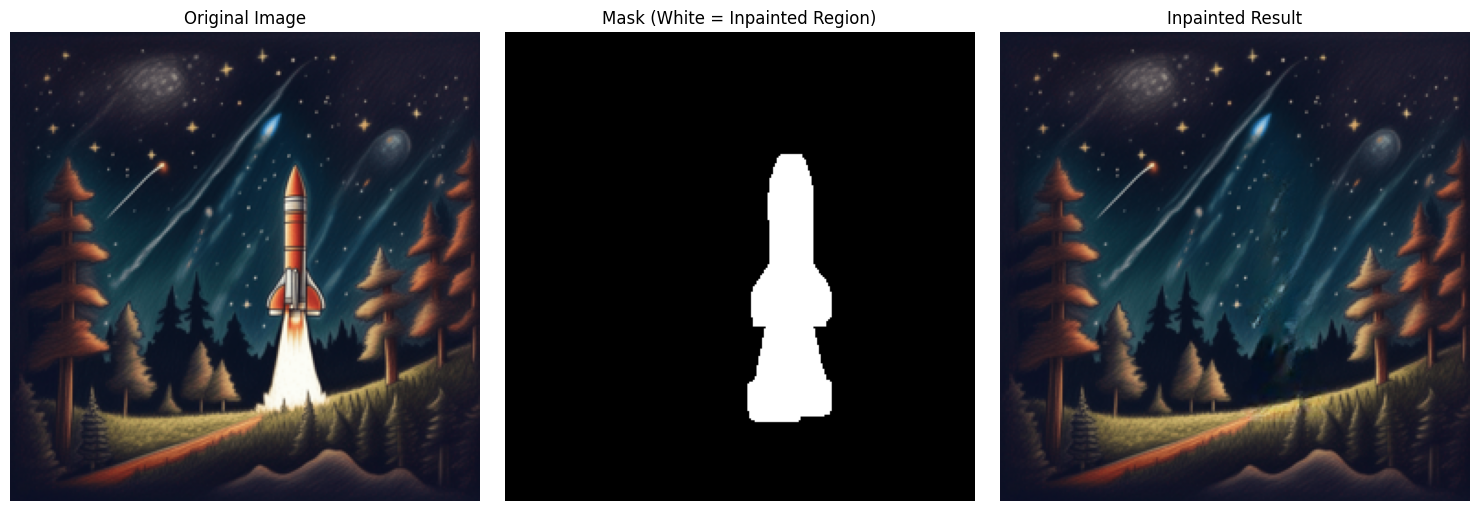


✓ Saved result to: inpainted_result.png


In [ ]:
#@title Example Usage - Test Inpainting và Evaluation
from google.colab import files
import io

# Upload ảnh test
print('> Upload ảnh test và mask (chọn 2 files):')
print('  - Image: ảnh gốc cần inpaint')
print('  - Mask: ảnh mask (vùng trắng sẽ bị xóa)')
uploaded = files.upload()

filenames = list(uploaded.keys())
if len(filenames) < 2:
    print('❌ Cần upload 2 files: image và mask!')
else:
    # Load images
    img_file = filenames[0]
    mask_file = filenames[1]

    image = Image.open(io.BytesIO(uploaded[img_file])).convert('RGB')
    mask = Image.open(io.BytesIO(uploaded[mask_file])).convert('L')

    print(f'\n> Image: {img_file} - Size: {image.size}')
    print(f'> Mask: {mask_file} - Size: {mask.size}')

    # Thực hiện inpainting
    print('\n> Running inpainting...')
    result = simple_lama(image, mask)

    # Đánh giá kết quả
    print('\n> Evaluating results...')
    metrics = evaluator.evaluate(
        original_img=np.array(image),
        inpainted_img=np.array(result),
        mask=np.array(mask),
        show_results=True
    )

    # Lưu kết quả
    result.save('inpainted_result.png')
    print('\n✓ Saved result to: inpainted_result.png')

> Upload ảnh test và mask (chọn 2 files):
  - Image: ảnh gốc cần inpaint
  - Mask: ảnh mask (vùng trắng sẽ bị xóa)


Saving nonresident-6-uNGPanQ-M_vertical.png to nonresident-6-uNGPanQ-M_vertical (1).png
Saving nonresident-6-uNGPanQ-M_vertical_mask.png to nonresident-6-uNGPanQ-M_vertical_mask (1).png

> Image: nonresident-6-uNGPanQ-M_vertical (1).png - Size: (1217, 1499)
> Mask: nonresident-6-uNGPanQ-M_vertical_mask (1).png - Size: (1217, 1499)

> Running inpainting...
> Resizing result from (1224, 1504) to (1217, 1499)

> Evaluating results...

EVALUATION RESULTS
PSNR:  10.84 dB  (Higher is better, >30 is good)
SSIM:  0.6667    (Higher is better, >0.9 is good)
LPIPS: 0.3835   (Lower is better, <0.2 is good)
FID:   58.46     (Lower is better)


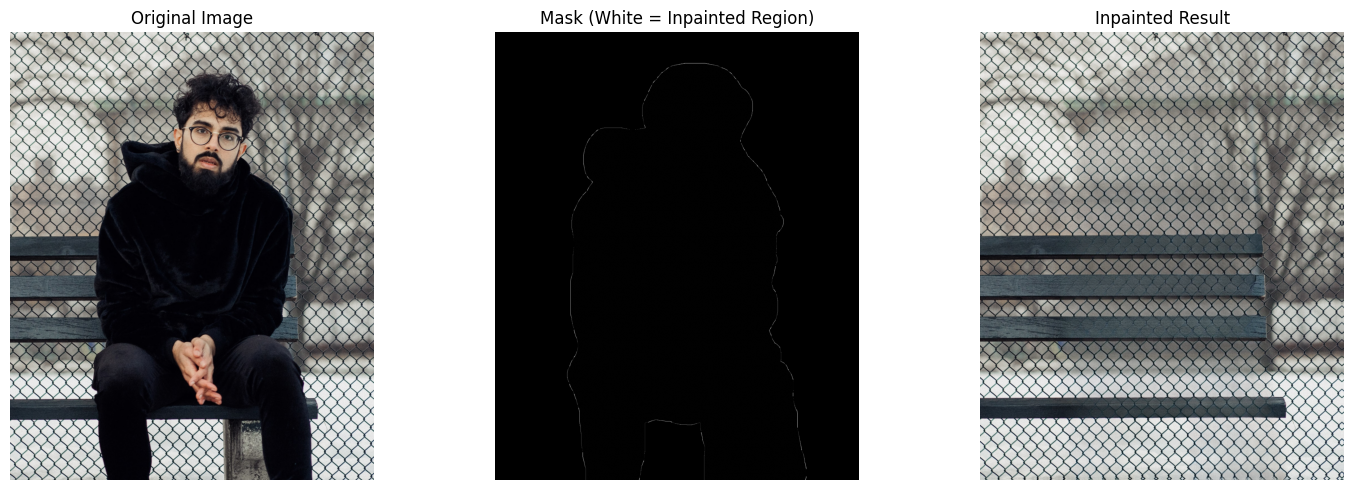

In [ ]:
#@title Example Usage - Test Inpainting và Evaluation
from google.colab import files
import io

# Upload ảnh test
print('> Upload ảnh test và mask (chọn 2 files):')
print('  - Image: ảnh gốc cần inpaint')
print('  - Mask: ảnh mask (vùng trắng sẽ bị xóa)')
uploaded = files.upload()

filenames = list(uploaded.keys())
if len(filenames) < 2:
    print('❌ Cần upload 2 files: image và mask!')
else:
    # Load images
    img_file = filenames[0]
    mask_file = filenames[1]

    image = Image.open(io.BytesIO(uploaded[img_file])).convert('RGB')
    mask = Image.open(io.BytesIO(uploaded[mask_file])).convert('L')

    print(f'\n> Image: {img_file} - Size: {image.size}')
    print(f'> Mask: {mask_file} - Size: {mask.size}')

    # Thực hiện inpainting
    print('\n> Running inpainting...')
    result = simple_lama(image, mask)

    # Resize output nếu kích thước không khớp
    if result.size != image.size:
      print(f"> Resizing result from {result.size} to {image.size}")
      result = result.resize(image.size, Image.BICUBIC)

    # Đánh giá kết quả
    print('\n> Evaluating results...')
    metrics = evaluator.evaluate(
        original_img=np.array(image),
        inpainted_img=np.array(result),
        mask=np.array(mask),
        show_results=True
    )
